# Dog Park "Pupularity" Patterns

### Sydney Smith, Jared Mohammed, Ally Cronander, & Marilyn Lalrindiki


<img src="https://cdn.vox-cdn.com/thumbor/SF6piad06hSD8E9dKKLyJWPpTzY=/0x0:6500x2600/1200x800/filters:focal(3179x641:4219x1681)/cdn.vox-cdn.com/uploads/chorus_image/image/56352925/Fetch_Park_8.24.17.0.jpg" width=400px>

Dog parks’ popularity varies depending on the day and time. Ingham County dog parks operate under a locked gate and key fob system to ensure all dogs entering the park are registered and vaccinated. Data from these gates has been recorded, including who comes in and who leaves at what times.This data can be used to model the popularity of the park.

The focal points that are being targeted are as follows:
 
* How has the popularity of the dog park changed by year?

* Which day of the week is the most popular?

* What time of the day is the most popular?

* Which days of the month are most popular?

* How does weather affect the popularity of the dog park for a week?

* How does the climate affect the popularity over the year?

* How can we predict the number of scans in a day based off of temperature?



In [1]:
# For the Professors grading this notebook:
#!git clone 

In [2]:
# import needed modules
import pandas as pd
import numpy as np
import datetime as dt
from datetime import time
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [3]:
# load in & examine the data!
dog_park = pd.read_csv("dogparkdata_2012to2018.csv")
dog_park.head()

,Unnamed: 0,names,times,valid
0,0,bdjdaabeacjjbibbafjcjdjfaibib,1/1/2012 8:31:46AM,Valid Access
1,1,abjejijgjejjbiagjebib,1/1/2012 10:27:20AM,Valid Access
2,2,abjejijgjejjbiagjebib,1/1/2012 10:52:26AM,Valid Access
3,3,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 10:52:48AM,Valid Access
4,4,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 11:19:56AM,Valid Access


The data shows us more than 11,000 scan entries from 2012 to 2018. Under the names column shows the different key fobs that scan into the dog park at specific dates and times.

In [4]:
# make the data more readable
# make dataframe into an array & split based on year
dog_park_array = np.array(dog_park)
data_2012 = dog_park_array[0:10891] #data from 2012
data_2013 = dog_park_array[10891:20945] #data from 2013
data_2014 = dog_park_array[20945: 32605] #data from 2014
data_2015 = dog_park_array[32605: 49340] #data from 2015
data_2016 = dog_park_array[49340:70150] #data from 2016
data_2017 = dog_park_array[70150:87560] #data from 2017
data_2018 = dog_park_array[87560:110066] #data from 2018

In [5]:
# deal with the yucky date/time string
# this function will create an array with the correct times in military time in the format [hour, minute, second]
def correct_time(array):
    '''
    - This is a function that makes a string of time more readable
    - inputs a string in the format 'month/day/time hour:minute:second AM or PM' 
    - outputs a time array the length of the initial array in the format [hour,minute,second] in military time
    
    '''
    correct_times = []
    for i in range(0,len(array)):
        date_time = array[i][2] 
        time = date_time[-10:-2]
        am_pm = date_time[-2]
        minute = int(time[3:5])
        second = int(time[6:8])
        hour = int(time[0:2]) 
        if am_pm == 'A' and hour != 12:
            correct_times.append([hour, minute,second])
        elif am_pm == 'P'and hour != 12:
            hour += 12
            correct_times.append([hour, minute, second])
        elif am_pm == 'A' and hour == 12:
            hour = 0
            correct_times.append([hour, minute, second])
        elif am_pm == 'P' and hour == 12:
            hour = 12
            correct_times.append([hour,minute,second])
    return(correct_times)

In [6]:
# dealing with the yucky date/time string continued
# this function will create an array with the correct date in the format [month, day, year]
def correct_date(array):
    '''
    - This is a function that makes a string of times and dates more readable
    - inputs a string in the format 'month/day/time hour:minute:second AM or PM' 
    - outputs a date array the length of the initial array in the format [month,day,year]
    '''
    correct_dates = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('/')
        month = int(find_month[0])
        find_day = find_month[2].partition('/')
        day = int(find_day[0])
        year = int(find_day[2])
        correct_dates.append([month,day,year])
    return(correct_dates)

In [7]:
# create an array of just user ids
# We are doing this so we do not have to deal with the big original dataset
def correct_userid(array):
    '''
    - This is a function that takes in an array with multiple variables like the original dataset
    - This function will output an array of just the user ids
    '''
    ids = []
    for i in range (0,len(array)):
        name = array[i][1]
        ids.append(name)
    return ids

In [8]:
# Use the functions we just made to make easily readable arrays
times_2012 = correct_time(data_2012)
dates_2012 = correct_date(data_2012)
users_2012 = correct_userid(data_2012)
times_2013 = correct_time(data_2013)
dates_2013 = correct_date(data_2013)
users_2013 = correct_userid(data_2013)
times_2014 = correct_time(data_2014)
dates_2014 = correct_date(data_2014)
users_2014 = correct_userid(data_2014)
times_2015 = correct_time(data_2015)
dates_2015 = correct_date(data_2015)
users_2015 = correct_userid(data_2015)
times_2016 = correct_time(data_2016)
dates_2016 = correct_date(data_2016)
users_2016 = correct_userid(data_2016)
times_2017 = correct_time(data_2017)
dates_2017 = correct_date(data_2017)
users_2017 = correct_userid(data_2017)
times_2018 = correct_time(data_2018)
dates_2018 = correct_date(data_2018)
users_2018 = correct_userid(data_2018)

In [9]:
#Now were going to define a function so these arrays are more useful
def find_indices(month,day,year,date_array):
    '''
    - This is a function that takes in a date and finds the indices for that specific date
    - Inputs:
        - month, day, year : Integers for the date wanted
        - date_array: This can be any array you want to find indices over
    - Returns two values, the first value is the first time the date appears in the array, 
      the second value is the last time the date appears in the array
    '''
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return(begin,end)

# example 
find_indices(2,14,2013, dates_2013)

(1297, 1323)

In [10]:
# Another helpful function
def unique(array):
    '''
    This is a function that takes in an array and outputs an array of the unique elements
    '''
    unique_array = []
    for point in array:
        if point not in unique_array:
            unique_array.append(point)
    return unique_array

#Example            
unique_dates = unique(dates_2012)

### How has the popularity of the dog park changed by year?


Text(0,0.5,'Total Scans')

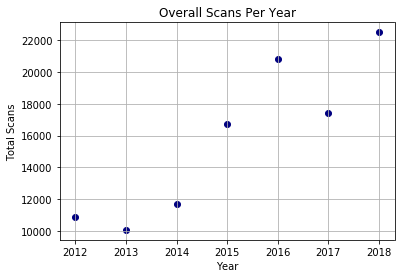

In [11]:
#Modeling scans per year by taking the length of each date array
scans_per_year = [len(dates_2012),len(dates_2013),len(dates_2014),len(dates_2015), len(dates_2016),len(dates_2017),len(dates_2018)]
year = [2012,2013,2014,2015,2016,2017,2018]
plt.scatter(year,scans_per_year,color = "navy")
plt.grid()
plt.title("Overall Scans Per Year")
plt.xlabel("Year")
plt.ylabel("Total Scans")

The popularity of the dog park has changed in an increasing linear pattern throughout the years. 

Keeping in mind the fact that a significant amount of data is missing from both 2013 and 2017 which explains the variation of the pattern. Also, since 2018 is not over yet, the data collected during this period only extends till the end of October.

### How does climate affect popularity?

Text(0,0.5,'Average Scans')

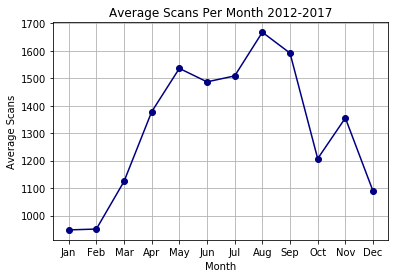

In [12]:
# This is a long cell, Sorry in advance
# We split this up using the find_indices function

#2012
jan2012 = dates_2012[0:662]
feb2012 = dates_2012[663:1389]
mar2012 = dates_2012[1390:2303]
apr2012 = dates_2012[2304:3207]
may2012 = dates_2012[3208:4190]
jun2012 = dates_2012[4191:5048]
jul2012 = dates_2012[5049:5998]
aug2012 = dates_2012[5999:6871]
sep2012 = dates_2012[6872:8012]
oct2012 = dates_2012[8013:9021]
nov2012 = dates_2012[9022:10034]
dec2012 = dates_2012[10035:]
#2013
jan2013 = dates_2013[0:848]
feb2013 = dates_2013[849:1733]
mar2013 = dates_2013[1734:2667]
apr2013 = dates_2013[2668:3426]
may2013 = dates_2013[3427:4578]
jun2013 = dates_2013[4579:5792]
jul2013 = dates_2013[5793:6468]
aug2013 = dates_2013[6469:8183]
oct2013 = dates_2013[8184:8292]
nov2013 = dates_2013[8293:9341]
dec2013 = dates_2013[9342:]
#2014
jan2014 = dates_2014[0:774]
feb2014 = dates_2014[775:1656]
mar2014 = dates_2014[1657:2684]
apr2014 = dates_2014[2685:4034]
may2014 = dates_2014[4035:5445]
jun2014 = dates_2014[5446:6788]
jul2014 = dates_2014[6789:8456]
aug2014 = dates_2014[8457:9721]
sep2014 = dates_2014[9722:11226]
oct2014 = dates_2014[11227:11660]
#2015
jan2015 = dates_2015[0:1028]
feb2015 = dates_2015[1029:1561]
mar2015 = dates_2015[1562:2548]
apr2015 = dates_2015[2549:3946]
may2015 = dates_2015[3947:5480]
jun2015 = dates_2015[5481:7084]
jul2015 = dates_2015[7085:8545]
aug2015 = dates_2015[8546:10349]
sep2015 = dates_2015[10350:12125] 
oct2015 = dates_2015[12126:13767]
nov2015 = dates_2015[13768:15448]
dec2015 = dates_2015[15449:]
#2016
jan2016 = dates_2016[0:1181]
feb2016 = dates_2016[1182:2261]
mar2016 = dates_2016[2262:3556]
apr2016 = dates_2016[3557:5409]
may2016 = dates_2016[5410:7417]
jun2016 = dates_2016[7418:9908]
jul2016 = dates_2016[9909:12303]
aug2016 = dates_2016[12304:14375]
sep2016 = dates_2016[14376:16134]
oct2016 = dates_2016[16135:17882]
nov2016 = dates_2016[17883:19686]
dec2016 = dates_2016[19687:]
#2017
jan2017 = dates_2017[0:1193]
feb2017 = dates_2017[1194:2797]
mar2017 = dates_2017[2798:4390]
apr2017 = dates_2017[4391:6400]
may2017 = dates_2017[6401:8534]
jun2017 = dates_2017[8535:9952]
jul2017 = dates_2017[9953:10351]
aug2017 = dates_2017[10352:12634]
sep2017 = dates_2017[12635:14416]
oct2017 = dates_2017[14417:14706]
nov2017 = dates_2017[14707:15941] 
dec2017 = dates_2017[15942:]

#Now were going to find the average number of scans per month
jan_avg = (len(jan2012) + len(jan2013) + len(jan2014) + len(jan2015)+ len(jan2016) + len(jan2017))/6
feb_avg = (len(feb2012) + len(feb2013) + len(feb2014) + len(feb2015)+ len(feb2016) + len(feb2017))/6
mar_avg = (len(mar2012) + len(mar2013) + len(mar2014) + len(mar2015)+ len(mar2016) + len(mar2017))/6
apr_avg = (len(apr2012) + len(apr2013) + len(apr2014) + len(apr2015)+ len(apr2016) + len(apr2017))/6
may_avg = (len(may2012) + len(may2013) + len(may2014) + len(may2015)+ len(may2016) + len(may2017))/6
jun_avg = (len(jun2012) + len(jun2013) + len(jun2014) + len(jun2015)+ len(jun2016) + len(jun2017))/6
jul_avg = (len(jul2012) + len(jul2013) + len(jul2014) + len(jul2015)+ len(jul2016) + len(jul2017))/5
aug_avg = (len(aug2012) + len(aug2013) + len(aug2014) + len(aug2015)+ len(aug2016) + len(aug2017))/6
sep_avg = (len(sep2012) + len(sep2014) + len(sep2015)+ len(sep2016) + len(sep2017))/5
oct_avg = (len(oct2012) + len(oct2014) + len(oct2015)+ len(oct2016))/4
nov_avg = (len(nov2012) + len(nov2013) + len(nov2015)+ len(nov2016) + len(nov2017))/5
dec_avg = (len(dec2012) + len(dec2013) + len(dec2015)+ len(dec2016) + len(dec2017))/5

#plotting
ys = [jan_avg,feb_avg,mar_avg,apr_avg,may_avg,jun_avg,jul_avg,aug_avg,sep_avg,oct_avg,nov_avg,dec_avg]
xs = ["Jan","Feb","Mar","Apr",'May',"Jun",'Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(xs,ys,marker = 'o',color = 'navy',label = '2017')
plt.grid()
plt.title("Average Scans Per Month 2012-2017")
plt.xlabel("Month")
plt.ylabel("Average Scans")

In general, the warmer months have more visitation than the colder winter months. Note that October is missing data in multiple years, so that would explain the dip in October. 

### Which day of the week is the most popular?

In [13]:
#This is a longer cell, Sorry again

#These were found again using find_indices
april2012 = dates_2012[2304:3207] #Calendar says April starts on a Sunday 
april2013 = dates_2013[2668:3426] #Starts on a monday
april2014 = dates_2014[2685:4034] #Starts on a tuesday
april2015 = dates_2015[2549:3946] #Starts on a wednesday
april2016 = dates_2016[3557:5409] #Starts on a friday
april2017 = dates_2017[4391:6400] #starts on a saturday
april2018 = dates_2018[5215:7870] #Starts on a sunday

#We are making a few statements that will add to these starting values
sundays = 0
mondays = 0 
tuesdays = 0
wednesdays = 0
thursdays = 0
fridays = 0
saturdays = 0
sundays = 0

#2012 data, this will count the number of Mondays, Tuesdays, etc. in April 2012
for i in range (len(april2012)):
    if april2012[i][1] == 1 or april2012[i][1] == 8 or april2012[i][1] == 15 or april2012[i][1] == 22 or april2012[i][1] == 29:
        sundays += 1
    elif april2012[i][1] == 2 or april2012[i][1] == 9 or april2012[i][1] == 16 or april2012[i][1] == 23 or april2012[i][1] == 30:
        mondays += 1
    elif april2012[i][1] == 3 or april2012[i][1] == 10 or april2012[i][1] == 17 or april2012[i][1] ==24:
        tuesdays += 1
    elif april2012[i][1] == 4 or april2012[i][1] == 11 or april2012[i][1] == 18 or april2012[i][1] == 25:
        wednesdays += 1
    elif april2012[i][1] ==5 or april2012[i][1] == 12 or april2012[i][1] == 19 or april2012[i][1] == 26:
        thursdays += 1
    elif april2012[i][1] == 6 or april2012[i][1] == 13 or april2012[i][1] == 20 or april2012[i][1] == 27:
        fridays += 1
    elif april2012[i][1] == 7 or april2012[i][1] == 14 or april2012[i][1] == 21 or april2012[i][1] == 28:
        saturdays += 1
#2013 data, this will count the number of Mondays, Tuesdays, etc. in April 2013
for i in range (len(april2013)):
    if april2013[i][1] == 1 or april2013[i][1] == 8 or april2013[i][1] == 15 or april2013[i][1] == 22 or april2013[i][1] == 29:
        mondays += 1
    elif april2013[i][1] == 2 or april2013[i][1] == 9 or april2013[i][1] == 16 or april2013[i][1] == 23 or april2013[i][1] == 30:
        tuesdays += 1
    elif april2013[i][1] == 3 or april2013[i][1] == 10 or april2013[i][1] == 17 or april2013[i][1] ==24:
        wednesdays += 1
    elif april2013[i][1] == 4 or april2013[i][1] == 11 or april2013[i][1] == 18 or april2013[i][1] == 25:
        thursdays += 1
    elif april2013[i][1] ==5 or april2013[i][1] == 12 or april2013[i][1] == 19 or april2013[i][1] == 26:
        fridays += 1
    elif april2013[i][1] == 6 or april2013[i][1] == 13 or april2013[i][1] == 20 or april2013[i][1] == 27:
        saturdays += 1
    elif april2013[i][1] == 7 or april2013[i][1] == 14 or april2013[i][1] == 21 or april2013[i][1] == 28:
        sundays += 1     
 #2014 data, this will count the number of Mondays, Tuesdays, etc. in April 2014      
for i in range (len(april2014)):
    if april2014[i][1] == 1 or april2014[i][1] == 8 or april2014[i][1] == 15 or april2014[i][1] == 22 or april2014[i][1] == 29:
        tuesdays += 1
    elif april2014[i][1] == 2 or april2014[i][1] == 9 or april2014[i][1] == 16 or april2014[i][1] == 23 or april2014[i][1] == 30:
        wednesdays += 1
    elif april2014[i][1] == 3 or april2014[i][1] == 10 or april2014[i][1] == 17 or april2014[i][1] ==24:
        thursdays += 1
    elif april2014[i][1] == 4 or april2014[i][1] == 11 or april2014[i][1] == 18 or april2014[i][1] == 25:
        fridays += 1
    elif april2014[i][1] ==5 or april2014[i][1] == 12 or april2014[i][1] == 19 or april2014[i][1] == 26:
        saturdays += 1
    elif april2014[i][1] == 6 or april2014[i][1] == 13 or april2014[i][1] == 20 or april2014[i][1] == 27:
        sundays += 1
    elif april2014[i][1] == 7 or april2014[i][1] == 14 or april2014[i][1] == 21 or april2014[i][1] == 28:
        mondays += 1 
#2015 data, this will count the number of Mondays, Tuesdays, etc. in April 2015
for i in range (len(april2015)):
    if april2015[i][1] == 1 or april2015[i][1] == 8 or april2015[i][1] == 15 or april2015[i][1] == 22 or april2015[i][1] == 29:
        wednesdays += 1
    elif april2015[i][1] == 2 or april2015[i][1] == 9 or april2015[i][1] == 16 or april2015[i][1] == 23 or april2015[i][1] == 30:
        thursdays += 1
    elif april2015[i][1] == 3 or april2015[i][1] == 10 or april2015[i][1] == 17 or april2015[i][1] ==24:
        fridays += 1
    elif april2015[i][1] == 4 or april2015[i][1] == 11 or april2015[i][1] == 18 or april2015[i][1] == 25:
        saturdays += 1
    elif april2015[i][1] ==5 or april2015[i][1] == 12 or april2015[i][1] == 19 or april2015[i][1] == 26:
        sundays += 1
    elif april2015[i][1] == 6 or april2015[i][1] == 13 or april2015[i][1] == 20 or april2015[i][1] == 27:
        mondays += 1
    elif april2015[i][1] == 7 or april2015[i][1] == 14 or april2015[i][1] == 21 or april2015[i][1] == 28:
        tuesdays += 1 
#2016 data, this will count the number of Mondays, Tuesdays, etc. in April 2016
for i in range (len(april2016)):
    if april2016[i][1] == 1 or april2016[i][1] == 8 or april2016[i][1] == 15 or april2016[i][1] == 22 or april2016[i][1] == 29:
         fridays += 1
    elif april2016[i][1] == 2 or april2016[i][1] == 9 or april2016[i][1] == 16 or april2016[i][1] == 23 or april2016[i][1] == 30:
        saturdays += 1
    elif april2016[i][1] == 3 or april2016[i][1] == 10 or april2016[i][1] == 17 or april2016[i][1] ==24:
        sundays += 1
    elif april2016[i][1] == 4 or april2016[i][1] == 11 or april2016[i][1] == 18 or april2016[i][1] == 25:
        mondays += 1
    elif april2016[i][1] ==5 or april2016[i][1] == 12 or april2016[i][1] == 19 or april2016[i][1] == 26:
        tuesdays += 1
    elif april2016[i][1] == 6 or april2016[i][1] == 13 or april2016[i][1] == 20 or april2016[i][1] == 27:
        wednesdays += 1
    elif april2016[i][1] == 7 or april2016[i][1] == 14 or april2016[i][1] == 21 or april2016[i][1] == 28:
        thursdays += 1 
#2017 data, this will count the number of Mondays, Tuesdays, etc. in April 2017
for i in range (len(april2017)):
    if april2017[i][1] == 1 or april2017[i][1] == 8 or april2017[i][1] == 15 or april2017[i][1] == 22 or april2017[i][1] == 29:
         saturdays += 1
    elif april2017[i][1] == 2 or april2017[i][1] == 9 or april2017[i][1] == 16 or april2017[i][1] == 23 or april2017[i][1] == 30:
        sundays += 1
    elif april2017[i][1] == 3 or april2017[i][1] == 10 or april2017[i][1] == 17 or april2017[i][1] ==24:
        mondays += 1
    elif april2017[i][1] == 4 or april2017[i][1] == 11 or april2017[i][1] == 18 or april2017[i][1] == 25:
        tuesdays += 1
    elif april2017[i][1] ==5 or april2017[i][1] == 12 or april2017[i][1] == 19 or april2017[i][1] == 26:
        wednesdays += 1
    elif april2017[i][1] == 6 or april2017[i][1] == 13 or april2017[i][1] == 20 or april2017[i][1] == 27:
        thursdays += 1
    elif april2017[i][1] == 7 or april2017[i][1] == 14 or april2017[i][1] == 21 or april2017[i][1] == 28:
        fridays += 1   
#2018 data, this will count the number of Mondays, Tuesdays, etc. in April 2018        
for i in range (len(april2018)):
    if april2018[i][1] == 1 or april2018[i][1] == 8 or april2018[i][1] == 15 or april2018[i][1] == 22 or april2018[i][1] == 29:
         sundays += 1
    elif april2018[i][1] == 2 or april2018[i][1] == 9 or april2018[i][1] == 16 or april2018[i][1] == 23 or april2018[i][1] == 30:
        mondays += 1
    elif april2018[i][1] == 3 or april2018[i][1] == 10 or april2018[i][1] == 17 or april2018[i][1] ==24:
        tuesdays += 1
    elif april2018[i][1] == 4 or april2018[i][1] == 11 or april2018[i][1] == 18 or april2018[i][1] == 25:
        wednesdays += 1
    elif april2018[i][1] ==5 or april2018[i][1] == 12 or april2018[i][1] == 19 or april2018[i][1] == 26:
        thursdays += 1
    elif april2018[i][1] == 6 or april2018[i][1] == 13 or april2018[i][1] == 20 or april2018[i][1] == 27:
        fridays += 1
    elif april2018[i][1] == 7 or april2018[i][1] == 14 or april2018[i][1] == 21 or april2018[i][1] == 28:
        saturdays += 1 

# We will be taking the average here
avg_mondays = mondays/30
avg_tuesdays= tuesdays/30
avg_wednesdays = wednesdays/30
avg_thursdays = thursdays/30
avg_fridays= fridays/30
avg_saturdays= saturdays/30
avg_sundays = sundays/30

Text(0,0.5,'Number of Scans')

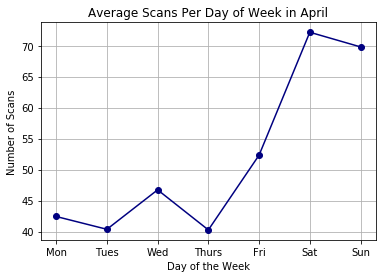

In [14]:
#plot the data we found in the above cell!
days = [avg_mondays, avg_tuesdays, avg_wednesdays,avg_thursdays, avg_fridays, avg_saturdays, avg_sundays]
y = ["Mon", "Tues", "Wed", "Thurs",'Fri', 'Sat', "Sun" ]
plt.plot(y,days, color = 'navy', marker = 'o')
plt.grid()
plt.title('Average Scans Per Day of Week in April')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Scans")

This lines up with our expectations, Saturday and Sunday are the most popular days of the week, on average.

### How does Weather affect the weekly popularity?

Text(0,0.5,'Number of Scans')

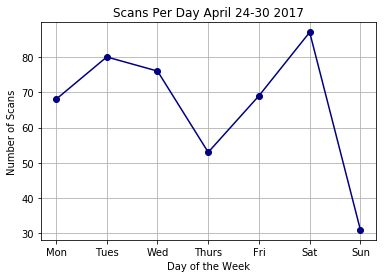

In [15]:
# We will model one specific week and compare it to the average so we can see the effect of the weather
#april 24-30 2017
m24 = len(dates_2017[5930:5998])
t25 = len(dates_2017[5999:6079])
w26 = len(dates_2017[6080:6156])
t27 = len(dates_2017[6157:6210])
f28 = len(dates_2017[6211:6280])
s29 = len(dates_2017[6281:6368])
s30 = len(dates_2017[6369:6400])
points = [m24,t25,w26,t27,f28,s29,s30]
days = ["Mon", "Tues", "Wed", "Thurs",'Fri', 'Sat', "Sun" ]
plt.plot(days,points, color = 'navy', marker = 'o')
plt.grid()
plt.title('Scans Per Day April 24-30 2017')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Scans")

In our presentation, we have the weather data for this week. In summary,Sunday was very rainy and cold. This is reflected in the weekly popularity, since Sunday is averagely up with Saturday, and this week it had very low visitation.

### What time of the day is the most popular?

In [16]:
# This is a function that will help us model the popularity over the course of a day

def plot_day_popularity(userid_array, times_array):
    '''
    -This is a function that will model the popularity of the dog park over the course of a day
    - Inputs:
        - userid_array: an array of each user_id that scanned in a given day
        - times_array: an array with the same length of userid_array that coorespond to the times of each scan
    - Outputs:
        - A histogram of the visitation by hour
        - An array with the times of visitation, used to make the histogram
    '''
    #this function starts out by removing the points where a user scanned in more than twice
    corrected_times = []
    corrected_users = []
    for i in range(len(userid_array)):
        if list(userid_array).count(userid_array[i]) == 2:
            corrected_times.append(times_array[i])
            corrected_users.append(userid_array[i])
    
    #time arrays
    #reference times is the array of all possible times
    #real times will be the actual times people were there
    reference_times = np.linspace(0,24,49) 
    real_times = []
    
    # this intermediate array will help us keep track of who we have looped through already
    intermediate_user_array = []
    
    #looping through every user
    for j in range (0,len(corrected_users)):
        intermediate_user_array.append(corrected_users[j])
        
        #first, we will find the time the user entered the park
        if list(intermediate_user_array).count(corrected_users[j])== 1:
            time_in = corrected_times[j]
            
        #then we will find the time the user left the park
        elif list(intermediate_user_array).count(corrected_users[j])== 2 :
            time_out = corrected_times[j]
            
            #then we will be rounding the values of time_in and time_out to make the histogram work more nicely
            if time_in[1] <= 15 and time_out[1] <= 15:
                rounded_time_in = float(time_in[0])
                rounded_time_out = float(time_out[0])
                # we will then loop through the possible times and find out when the user was there
                for k in range(len(reference_times)):
                    if rounded_time_in <= reference_times[k] and rounded_time_out >= reference_times[k]:
                        real_times.append(reference_times[k])
                        
            elif time_in[1] > 15 and time_in[1]<= 45 and time_out[1] <= 15:
                rounded_time_in = (2*time_in[0]+1)/2
                rounded_time_out = float(time_out[0])
                for l in range(len(reference_times)):
                    if rounded_time_in <= reference_times[l] and rounded_time_out >= reference_times[l]:
                        real_times.append(reference_times[l])
                        
            elif time_in[1] > 45 and time_out[1] <= 15:
                rounded_time_in = float(time_in[0] + 1)
                rounded_time_out = float(time_out[0]) 
                for m in range(len(reference_times)):
                    if rounded_time_in <= reference_times[m] and rounded_time_out >= reference_times[m]:
                        real_times.append(reference_times[m])
                        
            if time_in[1] <= 15 and time_out[1] >15 and time_out[1] <= 45:
                rounded_time_in = float(time_in[0])
                rounded_time_out = (2*time_out[0]+1)/2
                for n in range(len(reference_times)):
                    if rounded_time_in <= reference_times[n] and rounded_time_out >= reference_times[n]:
                        real_times.append(reference_times[n])
                        
            elif time_in[1] > 15 and time_in[1]<= 45 and time_out[1] >15 and time_out[1] <= 45:
                rounded_time_in = (2*time_in[0]+1)/2
                rounded_time_out = (2*time_out[0]+1)/2
                for o in range(len(reference_times)):
                    if rounded_time_in <= reference_times[o] and rounded_time_out >= reference_times[o]:
                        real_times.append(reference_times[o])
                        
            elif time_in[1] > 45 and time_out[1] >15 and time_out[1] <= 45:
                rounded_time_in = float(time_in[0] + 1)
                rounded_time_out = (2*time_out[0]+1)/2
                for p in range(len(reference_times)):
                    if rounded_time_in <= reference_times[p] and rounded_time_out >= reference_times[p]:
                        real_times.append(reference_times[p])
                        
            if time_in[1] <= 15 and time_out[1] >45:
                rounded_time_in = float(time_in[0])
                rounded_time_out = float(time_out[0]+1)
                for q in range(len(reference_times)):
                    if rounded_time_in <= reference_times[q] and rounded_time_out >= reference_times[q]:
                        real_times.append(reference_times[q])
                        
            elif time_in[1] > 15 and time_in[1]<= 45 and time_out[1] >45:
                rounded_time_in = (2*time_in[0]+1)/2
                rounded_time_out = float(time_out[0]+1)
                for r in range(len(reference_times)):
                    if rounded_time_in <= reference_times[r] and rounded_time_out >= reference_times[r]:
                        real_times.append(reference_times[r])
                        
            elif time_in[1] > 45 and time_out[1] >45:
                rounded_time_in = float(time_in[0] + 1)
                rounded_time_out = float(time_out[0]+1)
                for s in range(len(reference_times)):
                    if rounded_time_in <= reference_times[s] and rounded_time_out >= reference_times[s]:
                        real_times.append(reference_times[s])
    
    #the last part of this function is plotting using matplotlib!                    
    plt.hist(real_times, color = 'navy')
    plt.title("Popularity Throughout the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of People Present")
    plt.grid()
    return(real_times)

In [17]:
# We will use the function we just created to model different days

# May 31st, 2016
may31_times = times_2016[7355:7418]
may31_userid = users_2016[7355:7418]

#June 1st, 2016
june1_times = times_2016[7418:7471]
june1_userid = users_2016[7418:7471]

#June 2nd, 2016
june2_times = times_2016[7471:7574]
june2_userid = users_2016[7471:7574]

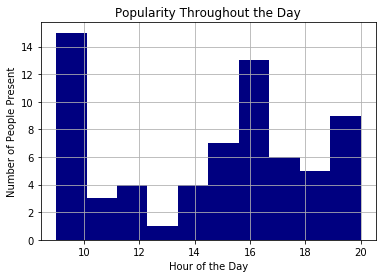

In [18]:
may31 = plot_day_popularity(may31_userid, may31_times)

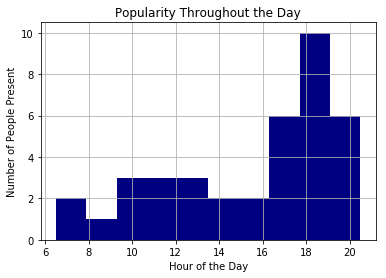

In [19]:
june1 = plot_day_popularity(june1_userid,june1_times)

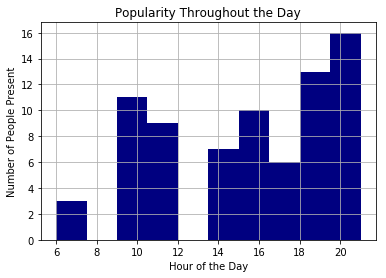

In [20]:
june2 = plot_day_popularity(june2_userid, june2_times)

This data appears to be inconclusive. This could suggest that multiple variables are having an effect on the popularity, and it can not be determined by time of day alone.

## Code to find most popular day of the month:

In [21]:
def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return (begin, end) 

find_indices function from above is used to find the indices for every day in the dates array of the month that we are investigating

In [22]:
def get_indices_for_date(year_array):
    """
    Gets the indices for each day for the entire month 
    """
    i = 1
    month_array_indices = []
    while i <= 30:
        begin1, end1 = find_indices(7,i,2016, year_array)
        beginend = [begin1, end1]
        month_array_indices.append(beginend)
        i+=1
        
    return month_array_indices

In [23]:
def get_user_ids(year_array, month_array_indices):
    """
    Get user IDs for each of the days of the entire month using the indices that
    were given
    """
    userid_month = []
    total_month = []
    for t in range(30):
        for i in range(0,len(year_array)):
            userid_month.append(year_array[i][1])
        practice = userid_month[month_array_indices[t-1][0]:month_array_indices[t-1][1]]
        total_month.append(practice)
        t+=1
        
    return total_month

In [24]:
def get_daily_freq(length_of_month, total_month):
    '''
    takes in the length of month and the total_month from get_user_ids function
    to get the unique users each day for the entire month
    '''
    dailyfreq_month = []

    for i in range(31):
        dailyuserid_month = total_month[i-1]
        dailyuniqueusers = np.unique(dailyuserid_month)
        dailyfreq_month.append(len(dailyuniqueusers))
        
    return dailyfreq_month

In [25]:
def create_date_list():
    '''
    takes in the number of days and creates a list of dates up to the number of days 
    in the month
    '''
    date = []

    for i in range(31):
        i+=1
        date.append(i)
    
    return date

In [26]:
def create_plot(date, dailyfreq_month):
    '''
    creates a plot using date list and daily_freq_month 
    '''
    #daily_freq_plot = plt.plot(date, dailyfreq_july2016, color = 'blue')
    plt.plot(date, dailyfreq_month, color = 'blue')
    plt.grid()
    plt.title("Unique Scans by Day (July 2016)")
    plt.xlabel("Date")
    plt.xticks(np.arange(min(date), max(date)+1, 1.0))
    plt.ylabel("Total Scans")
    plt.ylim(0,70)
    plt.xlim(1,31)
    #plt.figure(figsize=(8,12))
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.show()
    

In [27]:
def get_day_of_week():
    '''
    takes in daily_freq_month and returns the day of the week that corresponds 
    to the busiest day
    '''
    max_val_month = max(dailyfreq_month)
    max_index_month = dailyfreq_month.index(max_val_month)
    #print(max_index_july2016)
    day_of_week = dt.date(2016, 7, (max_index_month+1)).weekday()

    if day_of_week == 0:
        busiest_day = 'Monday'
    elif day_of_week == 1:
        busiest_day = "Tuesday"
    elif day_of_week == 2:
        busiest_day = "Wednesday"
    elif day_of_week == 3:
        busiest_day = "Thursday"
    elif day_of_week == 4:
        busiest_day = "Friday"
    elif day_of_week == 5:
        busiest_day = "Saturday"
    else:
        busiest_day = "Sunday"
        
    return busiest_day

In [28]:
class get_stats_for_month():
    '''
    This class is designed to take in information for a desired month and 
    return different stats for said month
    '''
    
    def __init__(self, length_of_month, month_num, year_num, date_array, darray):
        self.month_length = length_of_month
        self.month_num = month_num
        self.year_num = year_num
        self.date_array = date_array
        self.darray = darray
        
    def get_indices_for_date(self):
        """
        Gets the indices for each day for the entire month 
        """
        i = 1
        month_array_indices = []
        while i < self.month_length:
            begin1, end1 = find_indices(self.month_num, i, self.year_num, self.date_array)
            beginend = [begin1, end1]
            month_array_indices.append(beginend)
            i+=1
            
        self.month_array_indices = month_array_indices
        print(self.month_array_indices)

        #return month_array_indices
    
    def get_user_ids(self):
        """
        Get user IDs for each of the days of the entire month using the indices that
        were given
        """
        userid_month = []
        total_month = []
        for t in range(self.month_length):
            for i in range(0,len(self.darray)):
                userid_month.append(self.darray[i][1])
            practice = userid_month[self.month_array_indices[t-1][0]:self.month_array_indices[t-1][1]]
            total_month.append(practice)
            #t+=1
            
        self.total_month = total_month

        #return total_month
    
    def get_daily_freq(self):
        '''
        takes in the length of month and the total_month from get_user_ids function
        to get the unique users each day for the entire month
        '''
        dailyfreq_month = []

        for i in range(self.month_length):
            dailyuserid_month = self.total_month[i]
            dailyuniqueusers = np.unique(dailyuserid_month)
            dailyfreq_month.append(len(dailyuniqueusers))
            
        self.dailyfreq_month = dailyfreq_month

        return dailyfreq_month
    
    def create_date_list(self):
        '''
        takes in the number of days and creates a list of dates up to the number of days 
        in the month
        '''
        date = []

        for i in range(self.month_length):
            i+=1
            date.append(i)
            
        self.date = date

        #return date
    
    def create_plot(self):
        '''
        creates a plot using date list and daily_freq_month 
        '''
        #daily_freq_plot = plt.plot(date, dailyfreq_july2016, color = 'blue')
        plt.plot(self.date, self.dailyfreq_month, color = 'blue')
        plt.grid()
        plt.title("Unique Scans by Day")
        plt.xlabel("Date")
        plt.xticks(np.arange(min(self.date), max(self.date)+1, 1.0))
        plt.ylabel("Total Scans")
        plt.ylim(0,70)
        plt.xlim(1,self.month_length)
        #plt.figure(figsize=(8,12))
        plt.rcParams['figure.figsize'] = [10, 5]
        plt.show()
    
    def get_day_of_week(self):
        '''
        takes in daily_freq_month and returns the day of the week that corresponds 
        to the busiest day
        '''
        max_val_month = max(self.dailyfreq_month)
        max_index_month = self.dailyfreq_month.index(max_val_month)
        #print(max_index_july2016)
        day_of_week = dt.date(2016, 7, (max_index_month+1)).weekday()

        if day_of_week == 0:
            busiest_day = 'Monday'
        elif day_of_week == 1:
            busiest_day = "Tuesday"
        elif day_of_week == 2:
            busiest_day = "Wednesday"
        elif day_of_week == 3:
            busiest_day = "Thursday"
        elif day_of_week == 4:
            busiest_day = "Friday"
        elif day_of_week == 5:
            busiest_day = "Saturday"
        else:
            busiest_day = "Sunday"
            
        self.busiest_day = busiest_day

        return busiest_day


In [51]:
jul2012_stats = get_stats_for_month(31, 7, 2012, dates_2012, data_2012)

In [52]:
jul2012_stats.get_indices_for_date()

[[5049, 5087], [5087, 5117], [5117, 5134], [5134, 5166], [5166, 5187], [5187, 5201], [5201, 5229], [5229, 5279], [5279, 5303], [5303, 5332], [5332, 5356], [5356, 5386], [5386, 5417], [5417, 5469], [5469, 5503], [5503, 5520], [5520, 5547], [5547, 5574], [5574, 5600], [5600, 5646], [5646, 5701], [5701, 5751], [5751, 5768], [5768, 5802], [5802, 5829], [5829, 5850], [5850, 5872], [5872, 5910], [5910, 5947], [5947, 5967]]


In [53]:
jul2012_stats.get_user_ids()

In [54]:
jul2012_dogpark = jul2012_stats.get_daily_freq()



    
print(jan2012_dogpark)
print(len(jan2012_dogpark))
print(mar2012_dogpark)
print(len(mar2012_dogpark))
print(jul2012_dogpark)
print(len(jul2012_dogpark))
print(oct2012_dogpark)
print(len(oct2012_dogpark))

[8, 10, 12, 7, 12, 8, 14, 22, 22, 6, 8, 14, 2, 6, 15, 14, 14, 2, 11, 5, 6, 17, 10, 6, 10, 14, 4, 9, 19, 13, 8]
31
[3, 8, 10, 13, 14, 11, 14, 10, 9, 10, 21, 16, 15, 13, 20, 20, 11, 27, 19, 19, 16, 15, 9, 3, 16, 25, 12, 15, 15, 14, 3]
31
[9, 18, 16, 8, 17, 11, 7, 15, 23, 14, 15, 12, 14, 15, 22, 17, 9, 13, 14, 12, 22, 26, 25, 8, 17, 14, 10, 11, 18, 16, 9]
31
[7, 11, 17, 12, 15, 14, 21, 20, 10, 24, 9, 10, 8, 7, 24, 10, 19, 17, 11, 7, 22, 25, 20, 7, 27, 23, 14, 17, 22, 12, 7]
31


These are the amount of unique scans for the entire month of January, March, July, and October. We chose these months so that we had a month from every season to get a wide range of temperatures and all the possible visits per day for these temperatures

In [55]:
oct2012_stats.create_date_list()

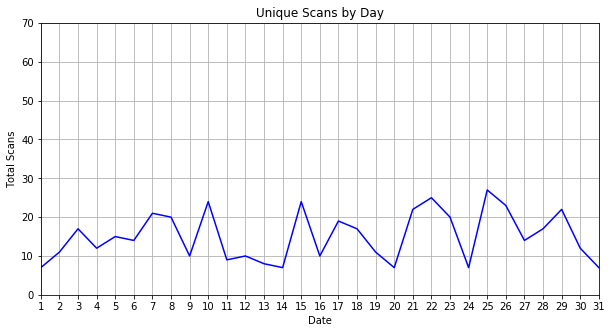

In [56]:
oct2012_stats.create_plot()

In [57]:
oct2012_stats.get_day_of_week()

'Monday'

## Finding the correlation between air temperature and visits per day to the dog park

**Read in the weather data**

In [36]:


weather = pd.read_csv('weather_data.csv', sep = ',', header = 0)
weather = weather.values
weather_data = np.zeros(4585)

weather

array([['USC00202437', 'EATON RAPIDS, MI US', '2012-01-03', nan, 17.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-04', nan, 22.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-09', nan, 28.0],
       ...,
       ['USW00014836', 'LANSING CAPITAL CITY AIRPORT, MI US',
        '2018-09-28', 55.0, nan],
       ['USW00014836', 'LANSING CAPITAL CITY AIRPORT, MI US',
        '2018-09-29', 49.0, nan],
       ['USW00014836', 'LANSING CAPITAL CITY AIRPORT, MI US',
        '2018-09-30', 46.0, nan]], dtype=object)

**Just the temperatures for the entire data set**

In [37]:
for i in range(2576):
    weather_data[i] = weather[i][4]
    
for i in range(2009):
    weather_data[i+2576] = weather[i+2733][3]
    
weather_data # data from 1/3/12 to 9/30/18

array([17., 22., 28., ..., 55., 49., 46.])

In [38]:
def correct_date_for_weather(array):
    '''
    Correcting the dates for the weather since in the 'weather' data set, 
    the dates are not in the best format for our use
    '''
    correct_dates_weather = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('-')
        year = int(find_month[0])
        find_day = find_month[2].partition('-')
        month = int(find_day[0])
        day = int(find_day[2])
        correct_dates_weather.append([month, day, year])
    return(correct_dates_weather)

corrected_weather_date = correct_date_for_weather(weather)

**create an array that stores the month, date, year, temperature, and dog park visits on that day**

In [39]:
complete_weather_temps = np.zeros((608,5), dtype=np.int)

for i in range(len(weather)):
    if weather[i][1] == 'GRAND LEDGE 1 NW, MI US':
        
        complete_weather_temps[i-2125][3] = weather[i][4]
        complete_weather_temps[i-2125][0] = int(corrected_weather_date[i][0])
        complete_weather_temps[i-2125][1] = int(corrected_weather_date[i][1])
        complete_weather_temps[i-2125][2] = int(corrected_weather_date[i][2])
        
complete_weather_temps

array([[   1,    1, 2012,   40,    0],
       [   1,    2, 2012,   25,    0],
       [   1,    3, 2012,   18,    0],
       ...,
       [   9,    3, 2013,   59,    0],
       [   9,    4, 2013,   57,    0],
       [   9,    5, 2013,   53,    0]])

**Append the dog park data to the array**

In [40]:
for i in range(360):
    if complete_weather_temps[i][0] == 1:
        complete_weather_temps[i][4] = jan2012_dogpark[i]
    elif complete_weather_temps[i][0] == 3:
        complete_weather_temps[i][4] = mar2012_dogpark[i-60]
    elif complete_weather_temps[i][0] == 7:
        complete_weather_temps[i][4] = jul2012_dogpark[i-179]
    elif complete_weather_temps[i][0] == 10:
        complete_weather_temps[i][4] = oct2012_dogpark[i-271]

complete_weather_temps

NameError: name 'jan2012_dogpark' is not defined

**Create a new array for only the months with complete data**

In [41]:
predict_model_array = np.zeros((122,5), dtype=np.int)

for i in range(len(complete_weather_temps)):
    if complete_weather_temps[i][4] == 0:
        continue
    elif complete_weather_temps[i][0] == 1:
        predict_model_array[i] = complete_weather_temps[i]
    elif complete_weather_temps[i][0] == 3:
        predict_model_array[i-29] = complete_weather_temps[i]
    elif complete_weather_temps[i][0] == 7:
        predict_model_array[i-118] = complete_weather_temps[i]
    elif complete_weather_temps[i][0] == 10:
        predict_model_array[i-179] = complete_weather_temps[i]
        
predict_model_array

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0,

**Create a graph that shows the correlation between air temperature and unique scans by day**

(-10, 90)

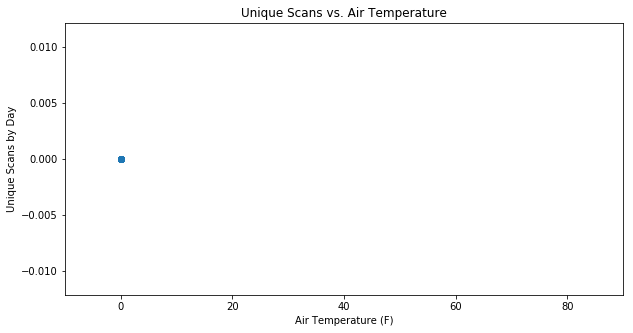

In [42]:
plt.scatter(predict_model_array[:,3], predict_model_array[:,4])
plt.title('Unique Scans vs. Air Temperature')
plt.xlabel('Air Temperature (F)')
plt.ylabel('Unique Scans by Day')
plt.xlim(-10, 90)

**Unfortunately, there is not much correlation in this graph, making a machine learning / line of regression completely unecessary and would then more than likely be inaccurate**